In [1]:
import pandas as pd
import numpy as np

from random import sample, randint, shuffle

import pickle

import os

import heapq
import nltk
import cv2

from sklearn.externals import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
# from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

# from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('pinterest_labels.csv')

In [2]:
df_copy = df
df.head()

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/


In [3]:
LOOKUP = set(['male','female','monster','environment'])
new_column = []
for i, row in enumerate(df['labels']):
    new_array = []
    items = row[1:len(row)-1]
    items = items.split(",")
    for item in items:
        new_item = item[1:len(item)-1]
        if new_item in LOOKUP:
            new_array.append(new_item)
    new_column.append(new_array)

In [4]:
print(new_column)

[['male', 'monster'], ['male', 'monster'], ['female', 'environment'], ['monster'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['monster', 'male'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['female', 'environment'], ['female', 'environment'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['female', 'monster'], ['male', 'monster'], ['male', 'monster'], ['monster', 'male'], ['monster'], ['monster'], ['environment'], ['male'], ['monster'], ['monster'], ['monster'], ['monster', 'male'], ['environment'], [], ['monster'], ['male'], ['environment'], ['monster', 'female', 'environment'], ['female', 'monster'], ['female', 'environment'], ['female', 'environment'], ['monster'], ['female'], ['male', 'monster'], ['female', 'monster'], [], [], ['monster'], ['male', 'environment'], ['female', 'monster'], ['female'], ['environment'], ['female'], ['environment'], ['monster

In [5]:
df['labels_std'] = new_column

In [6]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [7]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [8]:
df = df[df['labels_std'].map(len) > 0]

In [9]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [10]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [11]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [12]:
df = df.drop(['labels'], axis=1)

In [13]:
df = df.rename(columns={"labels_std": "labels"})

In [14]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [15]:
df['hexCode'].nunique()

14164

In [16]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [17]:
widthDict = {}
for width in df['imgWidth']:
    if width not in widthDict:
        widthDict[width] = 1
    else:
        widthDict[width] += 1
    
heightDict = {}
for height in df['imgHeight']:
    if height not in heightDict:
        heightDict[height] = 1
    else:
        heightDict[height] += 1

widthDictKeys, widthDictValues = widthDict.keys(), widthDict.values()
heightDictKeys, heightDictValues = heightDict.keys(), heightDict.values()

In [18]:
top_five_imgWidths = heapq.nlargest(5,widthDictValues)
top_five_imgHeights = heapq.nlargest(5,heightDictValues)

print(top_five_imgWidths,top_five_imgHeights)

[1026, 608, 528, 513, 477] [639, 571, 533, 521, 498]


In [19]:
histogramOfTopFiveWidths = []
for value in top_five_imgWidths:
    for key in widthDictKeys:
        if widthDict[key] == value:
            histogramOfTopFiveWidths.append((key, value))
print(histogramOfTopFiveWidths)

[(500, 1026), (600, 608), (1000, 528), (1920, 513), (640, 477)]


In [20]:
histogramOfTopFiveHeights = []
for value in top_five_imgHeights:
    for key in heightDictKeys:
        if heightDict[key] == value:
            histogramOfTopFiveHeights.append((key, value))
print(histogramOfTopFiveHeights)

[(1000, 639), (960, 571), (1600, 533), (800, 521), (1200, 498)]


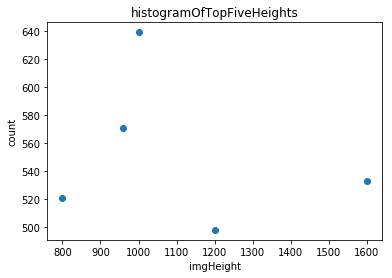

In [21]:
plt.scatter(*zip(*histogramOfTopFiveHeights))
plt.title('histogramOfTopFiveHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

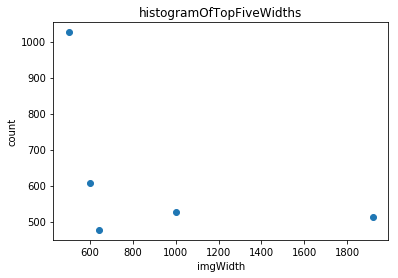

In [22]:
plt.scatter(*zip(*histogramOfTopFiveWidths))
plt.title('histogramOfTopFiveWidths')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [23]:
avgHeight = 0
for height in df['imgHeight']:
    avgHeight += height
avgHeight = avgHeight/len(df['imgHeight'])
print(avgHeight, len(df['imgHeight']))

1043.5123244929798 19230


In [24]:
avgWidth = 0
for width in df['imgWidth']:
    avgWidth += width
avgWidth = avgWidth/len(df['imgWidth'])
print(avgWidth, len(df['imgWidth']))

789.658190327613 19230


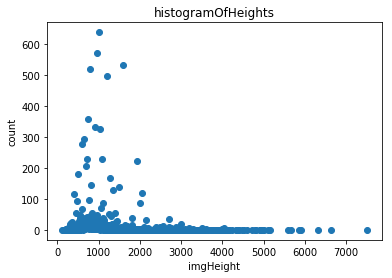

In [25]:
plt.scatter(*zip(*list(heightDict.items())))
plt.title('histogramOfHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

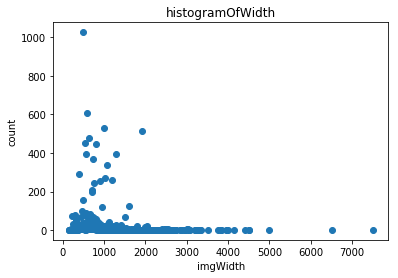

In [26]:
plt.scatter(*zip(*list(widthDict.items())))
plt.title('histogramOfWidth')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [27]:
colorHisto = {}
for color in df['hexCode']:
    if color not in colorHisto:
        colorHisto[color] = 1
    else:
        colorHisto[color] += 1

colorHistoKeys, colorHistoValues = colorHisto.keys(), colorHisto.values()
print(colorHisto)

{'#ffffff': 2265, '#313132': 2, '#2a2118': 2, '#a6aeb9': 2, '#494949': 5, '#567886': 2, '#56747f': 4, '#23212b': 2, '#d6d6d7': 2, '#60454c': 2, '#0c3034': 2, '#d8d8d8': 6, '#676c6f': 3, '#301b1b': 3, '#fef8d4': 23, '#fffefc': 4, '#29285e': 2, '#253117': 2, '#3e403d': 2, '#839f7f': 2, '#5d211b': 2, '#675a51': 3, '#fdfbfc': 2, '#7c7c7c': 7, '#753d23': 2, '#fefdfe': 3, '#a99d8d': 2, '#103232': 2, '#1d1e25': 2, '#c7bbc2': 2, '#282828': 6, '#414141': 6, '#292929': 8, '#ababab': 3, '#efeeea': 7, '#a79da1': 2, '#0b1229': 2, '#27292d': 2, '#6f4a42': 2, '#232323': 3, '#4d3f1f': 2, '#5b583a': 2, '#3e2520': 1, '#403328': 2, '#2c2a28': 2, '#768568': 2, '#b19581': 2, '#6c6650': 2, '#fefefe': 197, '#aba5a0': 2, '#26252b': 2, '#666874': 2, '#384a39': 2, '#515262': 2, '#594b5b': 2, '#c9c28e': 2, '#465159': 2, '#0f4443': 2, '#f8f6e2': 2, '#31613b': 2, '#635e51': 2, '#503c33': 2, '#eca930': 2, '#f3eb7b': 2, '#2f2b1f': 2, '#3c3c24': 2, '#313034': 2, '#6f5b4a': 2, '#202334': 2, '#76654d': 2, '#a09e98': 2,

In [28]:
# plt.scatter(*zip(*list(colorHisto.items())))
# plt.title('histogramOfHexCodes')
# plt.xlabel('hexCode')
# plt.ylabel('count')
# plt.show()

In [29]:
# https://github.com/Sukhrobjon/DS-2.1-ML-Challenges/blob/master/final_project/classifying_movie_genres.ipynb

# create dataframe
all_labels_df = pd.DataFrame({'Label': list(LabelsCount.keys()), 
                              'Count': list(LabelsCount.values())})


all_labels_df

,Label,Count
0,female,9448
1,male,8221
2,monster,10025
3,environment,7887


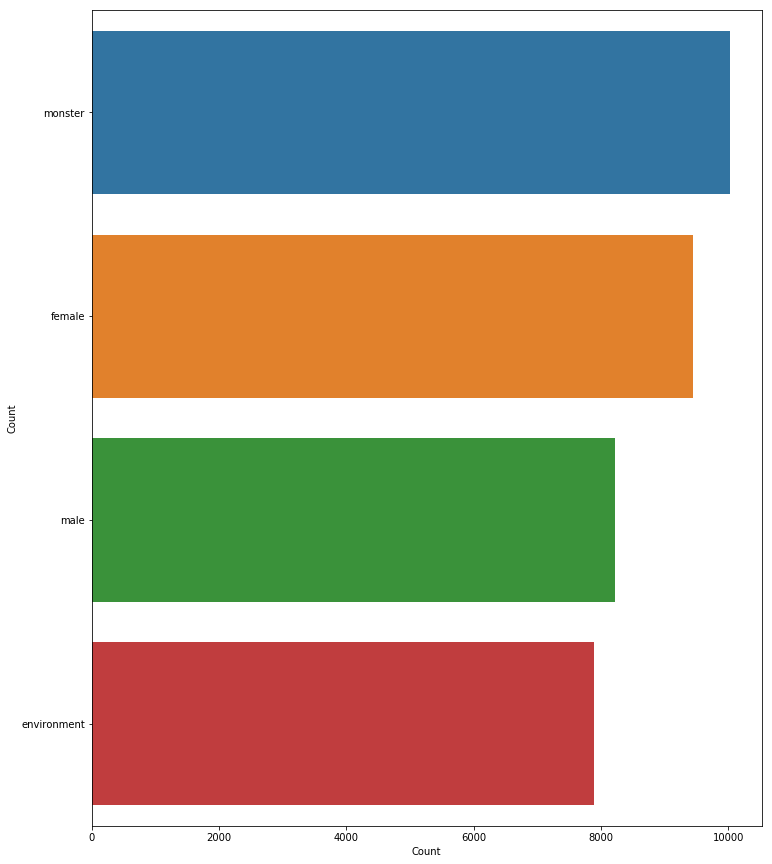

In [30]:
g = all_labels_df.nlargest(columns="Count", n = 4) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Label") 
ax.set(ylabel = 'Count') 
plt.show()

In [31]:
# copying the Description and Genre of a movie

dataset = pd.DataFrame(df[["imgUrl","labels"]])
dataset['key'] = dataset.index
dataset = dataset[['key', 'imgUrl', 'labels']]




data_mlb = MultiLabelBinarizer()

data_mlb.fit(dataset['labels'])


# transform target variable
target = data_mlb.transform(dataset['labels'])

list(data_mlb.classes_)

['environment', 'female', 'male', 'monster']

In [32]:
target

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0]])

In [33]:
dataset

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster]
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]"


In [34]:
# type(dataset)
# datasetMF = dataset[('male' in dataset['labels'] or 'female' in dataset['labels'])]
df_Monster = []
df_NotMonster = []


for i, j in dataset.iterrows():
    
    noMonster = True
    for label in j.labels:
        if label == 'monster':
            noMonster = False
            
    if noMonster:
        df_NotMonster.append(j)
    else:
        df_Monster.append(j)

df_Monster = pd.DataFrame(df_Monster)
df_NotMonster = pd.DataFrame(df_NotMonster)
  

In [35]:
df_Monster.head()

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster]


In [36]:
df_NotMonster.head()

,key,imgUrl,labels
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,[female]
12,12,https://i.pinimg.com/originals/49/79/83/497983...,"[male, environment]"
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,"[female, environment]"
14,14,https://i.pinimg.com/originals/87/39/19/873919...,"[female, environment]"


In [37]:
labelMonster = [1]* len(df_Monster)

In [38]:
df_Monster['y'] = labelMonster

In [39]:
labelNotMonster = [0]* len(df_NotMonster)

In [40]:
df_NotMonster['y'] = labelNotMonster

In [41]:
df_Monster.drop(['labels'], axis=1)

,key,imgUrl,y
0,0,https://i.pinimg.com/originals/21/18/03/211803...,1
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,1
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,1
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,1
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,1
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,1
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,1
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,1
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,1
11,11,https://i.pinimg.com/originals/3d/fc/5c/3dfc5c...,1


In [42]:
df_NotMonster.drop(['labels'], axis=1)

,key,imgUrl,y
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,0
10,10,https://i.pinimg.com/originals/f7/39/14/f73914...,0
12,12,https://i.pinimg.com/originals/49/79/83/497983...,0
13,13,https://i.pinimg.com/originals/3e/8d/00/3e8d00...,0
14,14,https://i.pinimg.com/originals/87/39/19/873919...,0
16,16,https://i.pinimg.com/originals/4d/46/38/4d4638...,0
18,18,https://i.pinimg.com/originals/2b/20/5f/2b205f...,0
29,29,https://i.pinimg.com/originals/44/8b/74/448b74...,0
30,30,https://i.pinimg.com/originals/d8/67/5c/d8675c...,0
35,35,https://i.pinimg.com/originals/95/07/b0/9507b0...,0


In [43]:
df_Monster_combined = pd.concat([df_Monster, df_NotMonster])

In [44]:
df_Monster_combined

,key,imgUrl,labels,y
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]",1
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]",1
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster],1
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster],1
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster],1
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster],1
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]",1
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]",1
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]",1
11,11,https://i.pinimg.com/originals/3d/fc/5c/3dfc5c...,[monster],1


In [45]:
df_Monster_combined = df_Monster_combined.sort_values(by=['key'])

In [46]:
df_Monster_combined

,key,imgUrl,labels,y
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]",1
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]",1
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]",0
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster],1
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster],1
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster],1
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster],1
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]",1
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]",1
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]",1


In [47]:
index = []
count = 0
for i,j in df_Monster_combined.iterrows():
    index.append(count)
    count += 1
print(index[0],index[-1])

0 19229


In [48]:
df_Monster_combined['index'] = index

In [49]:
df_Monster_combined.drop(['key'],axis=1)

,imgUrl,labels,y,index
0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]",1,0
1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]",1,1
2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]",0,2
3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster],1,3
4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster],1,4
5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster],1,5
6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster],1,6
7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]",1,7
8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]",1,8
9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]",1,9


In [50]:
df_Monster_combined = df_Monster_combined[['index','imgUrl','y','labels']]

In [51]:
df_Monster_combined

,index,imgUrl,y,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,1,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,1,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,0,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,1,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,1,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,1,[monster]
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,1,[monster]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,1,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,1,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,1,"[monster, male]"


In [52]:
df_Monster_combined = df_Monster_combined.reset_index()

In [53]:
df_Monster_combined = df_Monster_combined.drop(['level_0'], axis=1)

In [54]:
df_Monster_combined

,index,imgUrl,y,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,1,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,1,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,0,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,1,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,1,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,1,[monster]
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,1,[monster]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,1,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,1,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,1,"[monster, male]"


In [55]:
# df_Monster_combined.to_csv(r'/Users/jamesmccrory/Documents/dev/pinterest_dataset/MonsterNotMonster.csv', index = None, header=True)

In [56]:
# training and validation set
X_train_name, X_test_name, y_train, y_test = train_test_split(df_Monster_combined["index"], 
                                                    df_Monster_combined["y"], 
                                                    train_size=0.75, 
                                                    test_size=0.25)

In [57]:
# https://github.com/erykml/mario_vs_wario/blob/master/mario_vs_wario.ipynb
def img_to_1d_greyscale(img_path):
    # function for loading, resizing and converting an image into greyscale
    # used for logistic regression
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     print(img_path,img)
    
#     img = cv2.resize(img, size)
    return(pd.Series(img.flatten()))

In [58]:
size = (200, 200)

# defining empty containers
X_train = pd.DataFrame(np.zeros((len(X_train_name), size[0] * size[1])))
X_test = pd.DataFrame(np.zeros((len(X_test_name), size[0] * size[1])))
y_train = list()
y_test = list()

In [59]:
X_train_name.iloc[0]

593

In [60]:
print(df_Monster_combined.iloc[X_train_name.iloc[0]].y)
df_Monster_combined.iloc[X_train_name.iloc[0]].imgUrl

1


'https://i.pinimg.com/originals/19/b9/a6/19b9a6da2d360ff522eb93ff0b871447.png'

In [61]:

files = os.listdir('images/monster_not_monster_resized')
files.sort()

for i in range(len(X_train_name)):
    X_train.iloc[i, :] = img_to_1d_greyscale('images/monster_not_monster_resized/' + str(X_train_name.iloc[i]) + '.png') / 255
    y_train.append(df_Monster_combined.iloc[X_train_name.iloc[i]].y)

for i in range(len(X_test_name)):
    X_test.iloc[i, :] = img_to_1d_greyscale('images/monster_not_monster_resized/' + str(X_test_name.iloc[i]) + '.png') / 255
    y_test.append(df_Monster_combined.iloc[X_test_name.iloc[i]].y)


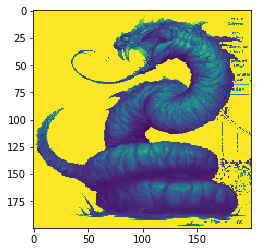

In [62]:
# example image
plt.imshow(np.reshape(X_train.iloc[0, ].values, size))

In [63]:
y_train[0]

1

In [68]:
logreg_classifier = LogisticRegression(solver = 'lbfgs', max_iter=5000)

In [69]:
logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
logreg_pred = logreg_classifier.predict(X_test)

In [71]:
# https://github.com/erykml/mario_vs_wario/blob/master/mario_vs_wario.ipynb
def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

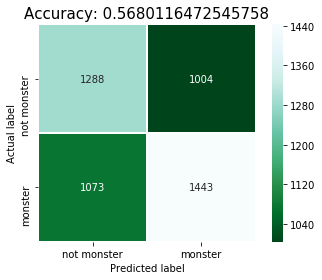

In [72]:
pretty_cm(logreg_pred, y_test, ['not monster', 'monster'])

In [73]:
def evaluation_indices(y_pred, y_test):
    # function for getting correctly and incorrectly classified indices
    index = 0
    correctly_classified_indices = []
    misclassified_indices = []
    for label, predict in zip(y_test, y_pred):
        if label != predict: 
            misclassified_indices.append(index)
        else:
            correctly_classified_indices.append(index)
        index +=1
    return (correctly_classified_indices, misclassified_indices)

In [74]:
correctly_classified_indices, misclassified_indices = evaluation_indices(logreg_pred, y_test)

In [75]:

# inspecting class labels for future reference 
labels_index = { 0 : "not monster", 1 : "monster" }

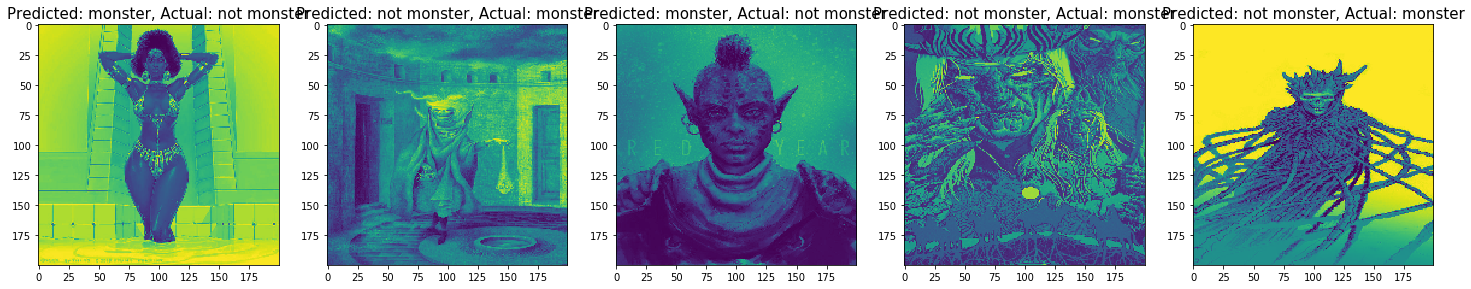

In [76]:
plt.figure(figsize=(25,5))
shuffle(misclassified_indices)

for plot_index, bad_index in enumerate(misclassified_indices[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(X_test.iloc[bad_index, :].values, size))
    plt.title('Predicted: {}, Actual: {}'.format(labels_index[logreg_pred[bad_index]], 
                                                 labels_index[y_test[bad_index]]), fontsize = 15)

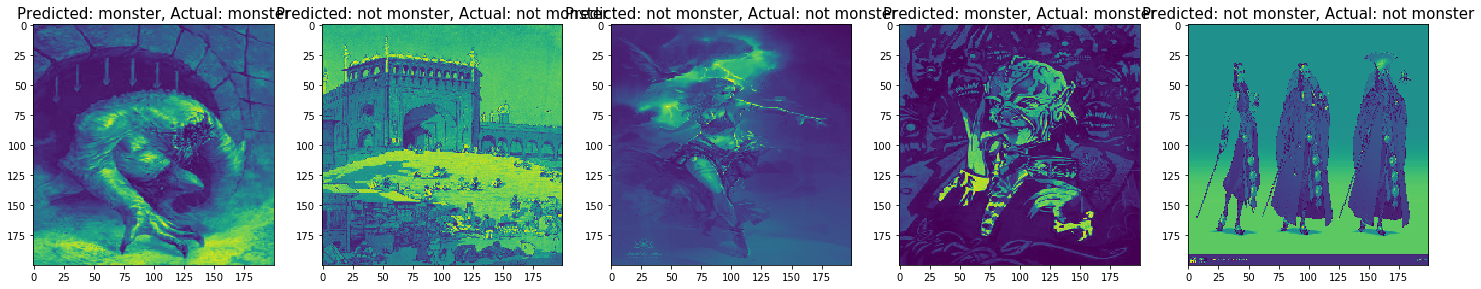

In [77]:
plt.figure(figsize=(25,5))
shuffle(correctly_classified_indices)

for plot_index, good_index in enumerate(correctly_classified_indices[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(X_test.iloc[good_index, :].values, size))
    plt.title('Predicted: {}, Actual: {}'.format(labels_index[logreg_pred[good_index]], 
                                                 labels_index[y_test[good_index]]), fontsize = 15)

In [78]:
joblib.dump(logreg_classifier, 'logreg_monster_classifier.pkl')

['logreg_monster_classifier.pkl']

In [79]:
# testing
# Load the model from the file 
reg_from_joblib = joblib.load('logreg_monster_classifier.pkl')  
  
# Use the loaded model to make predictions 
reg_from_joblib.predict([X_test.iloc[0,]])

# # define one new instance
# Xnew = [[-0.79415228, 2.10495117]]
# # make a prediction
# ynew = model.predict(Xnew)
# print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

array([0])

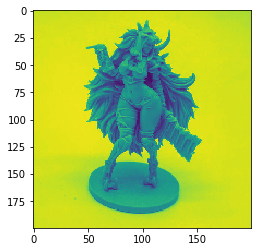

In [80]:
# example image
plt.imshow(np.reshape(X_test.iloc[0, ].values, size))